In [ ]:
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de Instituto BME.

# Para cada ejercicio: 1) Entregad un fichero en ipython notebook (.ipynb) ejecutable en Colab, y 
# 2) cada notebook ha de incluir un comentario sobre el ejercicio y sus resultados.

# 8) Resuelve el entorno de 'Mountain Car' de OpenGym usando dos algoritmos de uno de los frameworks 
# vistos en clase. Usa un algoritmo para el problema continuo
# ("MountainCarContinuous-v0") y otro para el problema discreto ("MountainCar-v0"). Compara los resultados.

In [ ]:
# como dijo Valero en clase, uso como referncia RL2_KerasRL2_Cartpole.ipynb 
# y RL3_Stablebaselines3_SpaceInvaders.ipynb

In [57]:
# 0 PARA EJECUTAR ENV.RENDER EN COLAB SEGUN INTERNET
# EL PROGRAMA LO HE CORRIDO EN LOCAL DURANTE VARIOS DIAS
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

!pip install gym pyvirtualdisplay > /dev/null 2>&1

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [43]:
# PARA RESOLVER el problema discreto ("MountainCar-v0")

# 1 RESOLVER ("MountainCar-v0")
# 1.1 INSTALALR LIBRERIAS

# RL2_KerasRL2_Cartpole.ipynb 
!pip3 install tensorflow==2.10.1
# Instalación de keras-rl 2
!pip install keras-rl2
# Esto hace falta para keras-rl2, segun dicen en su web
!pip install h5py
!pip install Pillow

In [44]:
# 1.2 HACERLO CORRER COMO EN referncia RL2_KerasRL2_Cartpole.ipynb 
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

# Cargamos el entorno

# ENV_NAME = 'CartPole-v0'
ENV_NAME = "MountainCar-v0"

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())


# Finally, we configure and compile our agent. You can use every built-in tensorflow.keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=5000, window_length=1)
policy = BoltzmannQPolicy() # EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 2)                 0         
                                                                 
 dense_34 (Dense)            (None, 16)                48        
                                                                 
 activation_16 (Activation)  (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 activation_17 (Activation)  (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 16)                272       
                                                                 
 activation_18 (Activation)  (None, 16)               

In [ ]:
# En Colab no es sencilla la visualización, se puede hacer pero es complicado. En el ordenador propio cambiar visualize=True y ya.
dqn.fit(env, nb_steps=4000000, visualize=False, verbose=2) # CREO QUE AQUI DEBERIA PONER MUCHOS MAS b_steps=200*2000*10=4000000; ANTES 5000

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Training for 4000000 steps ...
     200/4000000: episode: 1, duration: 3.871s, episode steps: 200, steps per second:  52, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.095 [0.000, 2.000],  loss: 0.175539, mae: 0.593857, mean_q: -0.576430
     400/4000000: episode: 2, duration: 1.365s, episode steps: 200, steps per second: 147, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.060 [0.000, 2.000],  loss: 0.004204, mae: 1.450582, mean_q: -2.137054
     600/4000000: episode: 3, duration: 1.372s, episode steps: 200, steps per second: 146, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.080 [0.000, 2.000],  loss: 0.012553, mae: 2.467228, mean_q: -3.654640
     800/4000000: episode: 4, duration: 1.345s, episode steps: 200, steps per second: 149, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.010 [0.000, 2.000],  loss: 0.041342, mae: 3.592044, mean_q: -5.310615
    1000/

In [47]:
# Finally, evaluate our algorithm for 5 episodes.
# Lo mismo que arriba, en Colab no es sencilla la visualización, se puede hacer pero es complicado. 
# En el ordenador propio cambiar visualize=True y ya.
dqn.test(env, nb_episodes=20, visualize=False) # ANTES 5

Testing for 20 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -200.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -200.000, steps: 200
Episode 6: reward: -200.000, steps: 200
Episode 7: reward: -200.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -200.000, steps: 200
Episode 10: reward: -200.000, steps: 200
Episode 11: reward: -200.000, steps: 200
Episode 12: reward: -200.000, steps: 200
Episode 13: reward: -200.000, steps: 200
Episode 14: reward: -200.000, steps: 200
Episode 15: reward: -200.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -200.000, steps: 200
Episode 20: reward: -200.000, steps: 200


In [21]:
# lO HAGO FUNCIONAR PERO NO APRENDE(CONVERGE).
# ASI QUE BUSCO OTROS MODELOS

In [49]:
# 1.3
# como no me converge, miro si con este ejemplo converge
# https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning/blob/master/Deep%20Reinforcement%20Learning.ipynb

# NO FUNCIONA EL COLAB PQ ME DA EL ERROR 
# env.render()
# No available video device


!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2
# 1.3.1. Test Random Environment with OpenAI Gym
import gym 
import random
env = gym.make("MountainCar-v0")
states = env.observation_space.shape[0]
actions = env.action_space.n
print(f'actions: {actions}')
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.3.0


actions: 3


Exception ignored in: <function Viewer.__del__ at 0x000001C21B971630>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 185, in __del__
    self.close()
  File "C:\ProgramData\anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 101, in close
    self.window.close()
  File "C:\ProgramData\anaconda3\lib\site-packages\pyglet\window\win32\__init__.py", line 332, in close
    super(Win32Window, self).close()
  File "C:\ProgramData\anaconda3\lib\site-packages\pyglet\window\__init__.py", line 858, in close
    app.windows.remove(self)
  File "C:\ProgramData\anaconda3\lib\_weakrefset.py", line 114, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x000001C22BA0E660; to 'Win32Window' at 0x000001C22B9FFF10>


Episode:1 Score:-200.0
Episode:2 Score:-200.0
Episode:3 Score:-200.0
Episode:4 Score:-200.0
Episode:5 Score:-200.0
Episode:6 Score:-200.0
Episode:7 Score:-200.0
Episode:8 Score:-200.0
Episode:9 Score:-200.0
Episode:10 Score:-200.0


In [37]:
# 1.3.2. Create a Deep Learning Model with Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model
model = build_model(states, actions)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 2)                 0         
                                                                 
 dense_31 (Dense)            (None, 24)                72        
                                                                 
 dense_32 (Dense)            (None, 24)                600       
                                                                 
 dense_33 (Dense)            (None, 3)                 75        
                                                                 
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 1.3.3. Build Agent with Keras-RL
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
#n_episodes=2000; nb_steps=2000*10000 = 20000000. tARDA MUCHO. PONGO LA MITAD
dqn.fit(env, nb_steps=10000000, visualize=False, verbose=1) # ANTES 50000

Training for 10000000 steps ...
Interval 1 (0 steps performed)
 7989/10000 [======================>.......] - ETA: 14s - reward: -1.0000done, took 57.058 seconds


In [36]:
scores = dqn.test(env, nb_episodes=100, visualize=False) # ANTES 100.
print(np.mean(scores.history['episode_reward']))

Testing for 2000 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -200.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -200.000, steps: 200
Episode 6: reward: -200.000, steps: 200
Episode 7: reward: -200.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -200.000, steps: 200
Episode 10: reward: -200.000, steps: 200
Episode 11: reward: -200.000, steps: 200
Episode 12: reward: -200.000, steps: 200
Episode 13: reward: -200.000, steps: 200
Episode 14: reward: -200.000, steps: 200
Episode 15: reward: -200.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -200.000, steps: 200
Episode 20: reward: -200.000, steps: 200
Episode 21: reward: -200.000, steps: 200
Episode 22: reward: -200.000, steps: 200
Episode 23: reward: -200.000, steps: 200
Episode 24: reward: -200.000, steps:

In [51]:
# 1.3.4. Reloading Agent from Memory

dqn.save_weights('dqn_weights.h5f', overwrite=True)
del model
del dqn
del env
env = gym.make("MountainCar-v0")
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.load_weights('dqn_weights.h5f')
_ = dqn.test(env, nb_episodes=5, visualize=True)

ValueError: Layer weight shape (2, 24) not compatible with provided weight shape (2, 16)

In [ ]:
# TAMPOCO DE ESTA SEGUNDA FORMA ME APRENDE##############################################
# EL AGENTE ES PARA CONTINUE SEGUN LA MATRIZ DE AGENTES EN LOS APUNTES.

Initialising DDQN Agent with params : {'env': <TimeLimit<MountainCarEnv<MountainCar-v0>>>, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.001, 'Q_targets': 0.0, 'state_size': 2, 'action_size': 3, 'callbacks': []}
Initialising Local DQNetwork
Initialising Target DQNetwork
Starting model training for 2000 episodes.
Episode 1	Average Score: -200.00	Score: -200.00	State: -0.530978798866272	Mean Q-Target: -0.9792	Effective Epsilon: 0.900	Time Taken: 33.89 sec
Episode 2	Average Score: -200.00	Score: -200.00	State: -0.34343335032463074	Mean Q-Target: -1.9385	Effective Epsilon: 0.810	Time Taken: 48.59 sec
Episode 3	Average Score: -200.00	Score: -200.00	State: -0.7328687310218811	Mean Q-Target: -2.8941	Effective Epsilon: 0.729	Time Taken: 49.14 sec
Episode 4	Average Score: -200.00	Score: -200.00	State: -0.505748450756073	Mean Q-Target: -3.7253	Effective Epsilon: 0.656	Time Taken: 47.89 sec
Episode 5	Average Score: -200.00	Score: -200.00	State: -0.6573373675346375	Mean Q-Target: -4.6454	Effective Eps

Exception ignored in: <function Viewer.__del__ at 0x000001C21B971630>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 185, in __del__
    self.close()
  File "C:\ProgramData\anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 101, in close
    self.window.close()
  File "C:\ProgramData\anaconda3\lib\site-packages\pyglet\window\win32\__init__.py", line 332, in close
    super(Win32Window, self).close()
  File "C:\ProgramData\anaconda3\lib\site-packages\pyglet\window\__init__.py", line 858, in close
    app.windows.remove(self)
  File "C:\ProgramData\anaconda3\lib\_weakrefset.py", line 114, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x000001C2270B4450; to 'Win32Window' at 0x000001C21B5960B0>
Exception ignored in: <function Viewer.__del__ at 0x000001C21B971630>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\gym\envs\classic_con

Episode 215	Average Score: -196.20	Score: -200.00	State: -0.21054282784461975	Mean Q-Target: -53.6285	Effective Epsilon: 0.001	Time Taken: 49.91 sec
Episode 216	Average Score: -196.20	Score: -200.00	State: -0.25705257058143616	Mean Q-Target: -51.6734	Effective Epsilon: 0.001	Time Taken: 49.13 sec
Episode 217	Average Score: -196.20	Score: -200.00	State: -0.9274163842201233	Mean Q-Target: -53.5414	Effective Epsilon: 0.001	Time Taken: 48.84 sec
Episode 218	Average Score: -195.84	Score: -164.00	State: 0.5261279344558716	Mean Q-Target: -52.4844	Effective Epsilon: 0.001	Time Taken: 40.11 sec
Episode 219	Average Score: -195.84	Score: -200.00	State: 0.21652533113956451	Mean Q-Target: -40.0564	Effective Epsilon: 0.001	Time Taken: 49.26 sec
Episode 220	Average Score: -195.84	Score: -200.00	State: -0.4818473756313324	Mean Q-Target: -53.4679	Effective Epsilon: 0.001	Time Taken: 49.15 sec
Episode 221	Average Score: -195.63	Score: -179.00	State: 0.5044873356819153	Mean Q-Target: -50.8540	Effective E

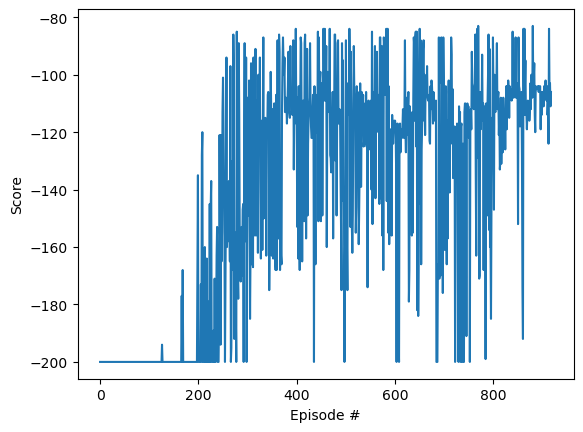

In [29]:
#1.4
# y COMO SIGUE SIN APRENDER, MIRO APLICAR ESTE EJEMPLO:
# https://github.com/mshik3/MountainCar-v0
# QUE NO CARGA AGENTES DE LIBRERIAS SINO LA CLASE DE UN AGENTE

# 1.4.1 IMPORTO Y CREO LA CLASE DQNetwork
import argparse
import os

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from time import time
import keras as K

import imageio

env_name = None
initial_timestamp = 0.0
np.random.seed(1024)

class DQNetwork:

    def __init__(self, state_size, action_size, action_high=1.0, action_low=0.0, layer_sizes=(64, 64),
                 batch_norm_options=(True, True), dropout_options=(0, 0), learning_rate=0.0001):
        self.state_size = state_size
        self.action_size = action_size
        self.action_high = action_high
        self.action_low = action_low
        self.layer_sizes = layer_sizes
        self.batch_norm_options = batch_norm_options
        self.dropout_options = dropout_options
        self.learning_rate = learning_rate

        self.build_model()

    def build_model(self):
        states = K.layers.Input(shape=(self.state_size,), name='states')
        net = states
        # hidden layers

        for layer_count in range(len(self.layer_sizes)):
            net = K.layers.Dense(units=self.layer_sizes[layer_count])(net)
            net = K.layers.Activation('relu')(net)
            if self.batch_norm_options[layer_count]:
                net = K.layers.BatchNormalization()(net)
            net = K.layers.Dropout(self.dropout_options[layer_count])(net)

        actions = K.layers.Dense(units=self.action_size, activation='linear',
                                 name='raw_actions')(net)

        self.model = K.models.Model(inputs=states, outputs=actions)

        self.optimizer = K.optimizers.Adam(lr=self.learning_rate)
        self.model.compile(loss='mse', optimizer=self.optimizer)
        
        
# 1.4.2 CREO LA CLASE DEL AGENTE DQN
import random
from collections import namedtuple, deque
class DDQNAgent:

    def __init__(self, env, buffer_size=int(1e5), batch_size=64, gamma=0.99, tau=1e-3, lr=5e-4, callbacks=()):
        self.env = env
        self.env.seed(1024)
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.Q_targets = 0.0
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self.callbacks = callbacks

        layer_sizes = [256, 256]
        batch_norm_options = [False, False]
        dropout_options = [0, 0]

        print("Initialising DDQN Agent with params : {}".format(self.__dict__))

        # Make local & target model
        print("Initialising Local DQNetwork")
        self.local_network = DQNetwork(self.state_size, self.action_size,
                                       layer_sizes=layer_sizes,
                                       batch_norm_options=batch_norm_options,
                                       dropout_options=dropout_options,
                                       learning_rate=lr)

        print("Initialising Target DQNetwork")
        self.target_network = DQNetwork(self.state_size, self.action_size,
                                        layer_sizes=layer_sizes,
                                        batch_norm_options=batch_norm_options,
                                        dropout_options=dropout_options,
                                        learning_rate=lr)

        self.memory = ReplayBuffer(buffer_size=buffer_size, batch_size=batch_size)

    def reset_episode(self):
        state = self.env.reset()
        self.last_state = state
        return state

    def step(self, action, reward, next_state, done):
        self.memory.add(self.last_state, action, reward, next_state, done)

        if len(self.memory) > self.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences, self.gamma)

        self.last_state = next_state

    def act(self, state, eps=0.):
        state = np.reshape(state, [-1, self.state_size])
        action = self.local_network.model.predict(state)

        if random.random() > eps:
            return np.argmax(action)
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        states, actions, rewards, next_states, dones = experiences

        for itr in range(len(states)):
            state, action, reward, next_state, done = states[itr], actions[itr], rewards[itr], next_states[itr], dones[
                itr]
            state = np.reshape(state, [-1, self.state_size])
            next_state = np.reshape(next_state, [-1, self.state_size])

            self.Q_targets = self.local_network.model.predict(state)
            if done:
                self.Q_targets[0][action] = reward
            else:
                next_Q_target = self.target_network.model.predict(next_state)[0]
                self.Q_targets[0][action] = (reward + gamma * np.max(next_Q_target))

            self.local_network.model.fit(state, self.Q_targets, epochs=1, verbose=0, callbacks=self.callbacks)

    def update_target_model(self):
        self.target_network.model.set_weights(self.local_network.model.get_weights())

# 1.4.3 CREO LA CLASE ReplayBuffer
class ReplayBuffer:

    def __init__(self, buffer_size, batch_size):
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)

        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.vstack([e.action for e in experiences if e is not None])
        rewards = np.vstack([e.reward for e in experiences if e is not None])
        next_states = np.vstack([e.next_state for e in experiences if e is not None])
        dones = np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)

#1.4.4 FUNCIONES PARA ENTRENAR
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

def train_model(n_episodes=2000, eps_start=1.0, eps_end=0.001, eps_decay=0.9, target_reward=1000):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    print("Starting model training for {} episodes.".format(n_episodes))
    consolidation_counter = 0
    for i_episode in range(1, n_episodes + 1):
        init_time = time()
        state = agent.reset_episode()
        score = 0
        done = False
        while not done:
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                agent.update_target_model()
                break
        time_taken = time() - init_time
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay * eps)
        print('Episode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tState: {}\tMean Q-Target: {:.4f}'
                     '\tEffective Epsilon: {:.3f}\tTime Taken: {:.2f} sec'.format(
            i_episode, np.mean(scores_window), score, state[0], np.mean(agent.Q_targets), eps, time_taken))
        if i_episode % 100 == 0:
            print(
                'Episode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tState: {}\tMean Q-Target: {:.4f}\tTime Taken: {:.2f} sec '.format(
                    i_episode, np.mean(scores_window), score, state[0], np.mean(agent.Q_targets), time_taken))
            agent.local_network.model.save('save/{}_local_model_{}.h5'.format(env_name, initial_timestamp))
            agent.target_network.model.save('save/{}_target_model_{}.h5'.format(env_name, initial_timestamp))
        if np.mean(scores_window) >= target_reward:
            consolidation_counter += 1
            if consolidation_counter >= 5:
                print("Completed model training with avg reward {} over last {} episodes."
                                    " Training ran for total of {} epsiodes".format(
                    np.mean(scores_window), 100, i_episode))
                return scores
        else:
            consolidation_counter = 0
    print("Completed model training with avg reward {} over last {} episodes."
                        " Training ran for total of {} epsiodes".format(
        np.mean(scores_window), 100, n_episodes))
    return scores

def play_model(actor, env_render=False, return_render_img=False):
    state = env.reset()
    print("Start state : {}".format(state))
    score = 0
    done = False
    images = []
    R = 0
    t = 0
    while not done:
        if env_render:
            if return_render_img:
                images.append(env.render("rgb_array"))
            else:
                env.render()
        state = np.reshape(state, [-1, env.observation_space.shape[0]])
        action = actor.predict(state)
        next_state, reward, done, _ = env.step(np.argmax(action))
        R += reward
        t += 1
        state = next_state
        score += reward
        if done:
            return score, images
    return 0, images

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))
    
# 1.4.5 ENTRENO

#train
env_name = "MountainCar-v0"
env = gym.make(env_name)#1
agent = DDQNAgent(env, buffer_size=100000, gamma=0.99, batch_size=64, lr=0.0001, callbacks=[])
scores = train_model(n_episodes=2000, target_reward=-110, eps_decay=0.9)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [52]:
# 1.4.6 RECUPERADMOS EL MODELO ENTRENADO Y TESTEAMOS
model = "save/MountainCar-v0_local_model_0.0.h5"
total_iterations = 100
expected_reward = -110

#Test
test_scores = []
print("Loading the saved model from '{}'".format(model))
actor = K.models.load_model('{}'.format(model))
print("Now running model test for {} iterations with expected reward >= {}".format(
    total_iterations, expected_reward))
frames = play_model(actor, True, True)[1]
for itr in range(1, total_iterations + 1):
    score = play_model(actor, True)[0]
    test_scores.append(score)
    print("Iteration: {} Score: {}".format(itr, score))
avg_reward = np.mean(test_scores)
print("Total Avg. Score over {} consecutive iterations : {}".format(total_iterations,
                                                                                 avg_reward))
if avg_reward >= expected_reward:
    print("Env. solved successfully.")
else:
    print("Agent failed to solve the env.")

Loading the saved model from 'save/MountainCar-v0_local_model_0.0.h5'
Now running model test for 100 iterations with expected reward >= -110
Start state : [-0.59266007  0.        ]


C:\ProgramData\anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Start state : [-0.54192555  0.        ]
Iteration: 1 Score: -104.0
Start state : [-0.43621108  0.        ]
Iteration: 2 Score: -106.0
Start state : [-0.49826202  0.        ]
Iteration: 3 Score: -104.0
Start state : [-0.47347  0.     ]
Iteration: 4 Score: -105.0
Start state : [-0.5299634  0.       ]
Iteration: 5 Score: -104.0
Start state : [-0.58832437  0.        ]
Iteration: 6 Score: -104.0
Start state : [-0.5824881  0.       ]
Iteration: 7 Score: -104.0
Start state : [-0.4007049  0.       ]
Iteration: 8 Score: -106.0
Start state : [-0.559311  0.      ]
Iteration: 9 Score: -104.0
Start state : [-0.5485294  0.       ]
Iteration: 10 Score: -104.0
Start state : [-0.4881849  0.       ]
Iteration: 11 Score: -104.0
Start state : [-0.42539465  0.        ]
Iteration: 12 Score: -106.0
Start state : [-0.57056206  0.        ]
Iteration: 13 Score: -104.0
Start state : [-0.4042899  0.       ]
Iteration: 14 Score: -106.0
Start state : [-0.53889245  0.        ]
Iteration: 15 Score: -104.0
Start state

In [ ]:
# ESTE SI APRENDIO Y AQUI ESTA LA PRUEBA YA QUE LOS SCORES
# EN TEST SON MENORES A -200
# CASI UN DIA ENTRENANDOLO

In [53]:
# 1.4.7 GUARDAMOS LA ANIMACION
ani.save('gifs/animation.html')

NameError: name 'ani' is not defined

In [54]:
# 1.4.8
i=0
for i in range(110):
  a = str(i).zfill(7)
  filename = "frame" + a + ".png"
  uploaded = drive.CreateFile({'title': filename})
  uploaded.SetContentFile("gifs/animation_frames/" + filename)
  uploaded.Upload()
  print("uploaded 1")

NameError: name 'drive' is not defined

In [ ]:
# 1.4.9. DONDE SE GRABAN LAS ANIMACIONES
ls gifs/animation_frames

In [ ]:
# 2
# PARA RESOLVER el problema discreto (""MountainCarContinuous-v0"")
# RL3_Stablebaselines3_SpaceInvaders.ipynb
# Y DE INTERNET HE SACADO ESTE PROGRAMA QUE FUNCIONA
# https://reneelin2019.medium.com/use-stable-baselines3-to-solve-mountain-car-continuous-in-gym-3216912cd5e3
# "Resuelve el entorno de 'Mountain Car' de OpenGym usando dos algoritmos 
# de uno de los frameworks vistos en clase. Usa un algoritmo para el problema
# continuo ("MountainCarContinuous-v0") " 
# EN ESTE CASO USARIA PPO


# 2.1 INSTALO LIBRERIAS

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
# display = Display(visible=0, size=(400, 300)) # PARA PODER HACERLO EN COLAB SEGUN INTERNET. LO HICE EN LOCAL
# display.start() # PARA PODER HACERLO EN COLAB. LO HICE EN LOCAL


# 2.2 Install packages
!pip install stable-baselines3[extra]
import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
import os
import time

# 2.3 Create folders to save models and logs
# Saving logs to visulise in Tensorboard, saving models
models_dir = f"models/Mountain-{time.time()}"
logdir = f"logs/Mountain-{time.time()}"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
if not os.path.exists(logdir):
    os.makedirs(logdir)

# 2.4 Create an Environment
# Parallel environments
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)

# 2.5 Set up the model with SB3
# The learning agent and hyperparameters
model = PPO(
    policy=MlpPolicy,
    env=env,
    seed=0,
    batch_size=256,
    ent_coef=0.00429,
    learning_rate=7.77e-05,
    n_epochs=10,
    n_steps=8,
    gae_lambda=0.9,
    gamma=0.9999,
    clip_range=0.1,
    max_grad_norm =5,
    vf_coef=0.19,
    use_sde=True,
    policy_kwargs=dict(log_std_init=-3.29, ortho_init=False),
    verbose=1,
    tensorboard_log=logdir
    )

# 2.6 Training
#Training and saving models along the way
TIMESTEPS = 20000
for i in range(10): 
    model.learn(total_timesteps=TIMESTEPS,reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{models_dir}/{TIMESTEPS*i}")



     ---------------------------------------- 38.2/38.2 MB 8.3 MB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 7.4 MB/s eta 0:00:00
     -------------------------------------- 904.7/904.7 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
Using cpu device
Logging to logs/Mountain-1684206777.6811385\PPO_0
----------------------------
| time/              |     |
|    fps             | 232 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 8   |
----------------------------


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\programdata\\anaconda3\\scripts\\pygmentize.exe'
Consider using the `--user` option or check the permissions.

C:\ProgramData\anaconda3\lib\site-packages\stable_baselines3\ppo\ppo.py:148: UserWarning: You have specified a mini-batch size of 256, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8 and n_envs=1)
  warnings.warn(


-------------------------------------------
| time/                   |               |
|    fps                  | 117           |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 16            |
| train/                  |               |
|    approx_kl            | 2.0675361e-05 |
|    clip_fraction        | 0.2           |
|    clip_range           | 0.1           |
|    entropy_loss         | 1.37          |
|    explained_variance   | -0.258        |
|    learning_rate        | 7.77e-05      |
|    loss                 | 0.00378       |
|    n_updates            | 10            |
|    policy_gradient_loss | 0.00058       |
|    std                  | 0.0372        |
|    value_loss           | 5.58e-05      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 126           |
|    iterations           | 3   

In [59]:
# 2.7 CHEQUEAR EL MEJOR MODELO DE UNO DE LOS ZIP
# Load the best model to check the result
# Check model performance
# load the best model you observed from tensorboard - the one reach the goal/ obtaining highest return
models_dir = "models/Mountain-1684206777.6811385"# este numero puede cambiar
model_path = f"{models_dir}/80000"
best_model = PPO.load(model_path, env=env)
obs = env.reset()
# while True:
action, _states = best_model.predict(obs)
obs, rewards, dones, info = env.step(action)
print(action, _states, obs, rewards, dones, info)
    # env.render()  use Python IDE to check, I havn't figure out how to render in Notebook

[[0.08574101]] None [[-0.58851105  0.00061692]] [-0.00073515] [False] [{}]


In [61]:
# 2.8 CHEQUEAR EL MEJOR MODELO DE UNO DE LOS ZIP, SI NO VA EL PATH
# Puedes buscar los zip; ponerlos en el path donde esta este ipynb
# y cargarlo asi:

model_path = "80000"
best_model = PPO.load(model_path, env=env)
obs = env.reset()
#while True:
action, _states = best_model.predict(obs)
obs, rewards, dones, info = env.step(action)
print(action, _states, obs, rewards, dones, info)
    # env.render()  use Python IDE to check, I havn't figure out how to render in Notebook

FileNotFoundError: [Errno 2] No such file or directory: '80000.zip'

In [62]:
# 3 OTRA OPCION  PARA EL "MountainCarContinuous-v0" QUE NO ME VA POR CULPA DEL PYTORCH
# PARA RESOLVER el problema discreto (""MountainCarContinuous-v0"")
# RL3_Stablebaselines3_SpaceInvaders.ipynb
# Esto hacía falta antes
!pip install --upgrade --force-reinstall gym

# La opcion oficial no funciona 5/4/2023
#!pip install stable_baselines3[extra]

# Alternativa 
# !pip install git+https://github.com/carlosluis/stable-baselines3@fix_tests

!pip install stable_baselines3
!pip3 install gym[atari,accept-rom-license]

import gym
#from gym.wrappers import Monitor




import base64
from pathlib import Path
from IPython import display as ipythondisplay
# en la presentacion del problema, Valero dijo usar DDPG ya que es para continius only
# y auque eniendo qeu el A2C validria pq sirve apra continues tambien, 
# voy a aponer tambien el DDPG
# https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html
# As DDPG can be seen as a special case of its successor TD3, 
# they share the same policies and same implementation.

# MlpPolicy: alias of TD3Policy
# CnnPolicy: Policy class (with both actor and critic) for TD3.
# MultiInputPolicy: Policy class (with both actor and critic) for 
# TD3 to be used with Dict observation spaces.


from stable_baselines3 import A2C, DDPG ##############
from stable_baselines3.common.env_util import make_vec_env
import os

from stable_baselines3.common.evaluation import evaluate_policy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.1 requires pygments>=2.0, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which


  Using cached gym-0.26.2-py3-none-any.whl
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)
  Attempting uninstall: gym-notices
    Found existing installation: gym-notices 0.0.8
    Uninstalling gym-notices-0.0.8:
      Successfully uninstalled gym-notices-0.0.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.0.0
    Uninstalling cloudpickle-2.0.0:
      Successfully uninstalled cloudpickle-2.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.26.2
    Uninstalling gym-0

In [65]:
# SI LO RESUELVE CON A2C COMO EN LOS APUNTES DE VALERO
ENV_NAME = "MountainCarContinuous-v0"
env = gym.make(ENV_NAME)
# height, width, channels = env.observation_space.shape
# actions = env.action_space.n
# experiment_dir = os.path.abspath("./experiments/{}".format(env.spec.id))
# monitor_path = os.path.join(experiment_dir, "monitor")

# if not os.path.exists(monitor_path):
#     os.makedirs(monitor_path)
# env = Monitor(env, directory=monitor_path, video_callable=lambda count: count % record_video_every == 0, resume=True)
# record_video_every =1

!pip install PyTorch
!pip install pytorch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1 cpuonly -c pytorch
!pip install torch torchvision --index.url https://download.pytorch.org/whl/cu117 --timeout=1000
import torch


model = A2C("MlpPolicy", env, verbose=1) #Podemos elegir entre varias politicas, como MLPpolicy, CnnPolicy, MultiInputPolicy
model.learn(total_timesteps=25000)
model.save("a2c_SpaceInvaders")
recompensa_media, desviacion = evaluate_policy(model, model.get_env(), deterministic=True, n_eval_episodes=20)
print(f"recompensa_media:{recompensa_media:.2f} +/- {desviacion:.2f}")


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for PyTorch
Failed to build PyTorch
  Running setup.py install for PyTorch: started
  Running setup.py install for PyTorch: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-_hxdyip7\pytorch_36436eea81e548eaadf2137557411606\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyTorch
  error: subprocess-exited-with-error
  
  Running setup.py install for PyTorch did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --index.url


RuntimeError: Calling torch.geqrf on a CPU tensor requires compiling PyTorch with LAPACK. Please use PyTorch built with LAPACK support.

In [ ]:
# NO ENTIENDO PA NO VA EL PyTorch YA QUE HE PUESTO LAS LIBRERIAS COMO DICE EN INTERNET

In [68]:
# 4.OTRA OPCION PARA ENTRENAR EL "MountainCarContinuous-v0"
# SI LO RESUELVE CON DDPG COMO PIDIO VALERO EN LA CLASE COMO SE VE EN INTERNET
# https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html
# EXAMPLE
# import gymnasium as gym ##################### ME DA UN ERROR
import numpy as np

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

ENV_NAME = "MountainCarContinuous-v0"
env = gym.make(ENV_NAME)

# The noise objects for DDPG
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=10000, log_interval=10)
model.save("ddpg_MountainCarContinuous")
env = model.get_env()

del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_MountainCarContinuous")

obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = env.step(action)
#     env.render()

action, _states = model.predict(obs)
obs, rewards, dones, info = env.step(action)
env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.35    |
| time/              |          |
|    episodes        | 10       |
|    fps             | 12       |
|    time_elapsed    | 829      |
|    total_timesteps | 9990     |
| train/             |          |
|    actor_loss      | -0.0337  |
|    critic_loss     | 5.55e-07 |
|    learning_rate   | 0.001    |
|    n_updates       | 8991     |
---------------------------------


True